# Exercise 2.2 Complex Machine Learning Models and Keras

### Contents:

#### 01. Importing Libraries and Data
#### 02. Preoprocessing: Cleaning, Wrangling, and Reshaping Data
#### 03. Recurrent Neural Networks(RNN) / Long Short-Term Memory
#### 04. Convolution Neural Network (CNN)

## 01. Importing Libraries and Data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from numpy import unique
from numpy import reshape
from keras.models import Sequential
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, Dropout, MaxPooling1D, Input
from keras.utils import to_categorical
from keras.layers import LSTM

In [2]:
# Set option to ensure charts are displayed inline in the notebook

%matplotlib inline

In [3]:
# Set option to display max number of columns

pd.set_option('display.max_columns', None)

In [4]:
# Define path for importing the data

path = r'C:\Users\jenci\Documents\Data Analytics\Data Analytics\Machine Learning\Achievement 2\Achievment Project'

In [5]:
# Import data

df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Dataset-weather-prediction-dataset-processed.csv'))

In [6]:
pleasant = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [7]:
# Check data

df.head(1)

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.0,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,7.7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,5.4,0.83,1.0161,0.12,0.08,0,0.0,10.0,7.0,11.5,8,0.91,0.0,0,0.8,-0.3,1.6,7,0.91,1.001,0.13,0.22,0,0.0,10.6,9.4,8.3,2.9,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.4,1.0,1.0173,0.2,0.0,0.0,-0.6,-1.9,0.5,7,8.7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.0,0.92,1.026,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,0.2,0.1,0,0.0,6.9,1.1,10.4,8,4.0,0.98,0.9978,0.04,1.14,0,0.0,4.9,3.8,5.9,3,2.6,0.73,1.0152,7.1,7.8,4,4.5,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,3.8,0.76,1.0169,1.54,0.44,10.0,7.8,12.2,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9


In [8]:
pleasant.head(1)

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
# Check shape

df.shape

(22950, 170)

In [10]:
# Check shape

pleasant.shape

(22950, 16)

## 02. Preoprocessing: Cleaning, Wrangling, and Reshaping Data

**Data Cleaning and Wrangling**

In [11]:
# Display all rows for the missing values check
pd.set_option('display.max_rows', None)

# Check for missing values
df.isnull().sum()

DATE                           0
MONTH                          0
BASEL_cloud_cover              0
BASEL_wind_speed               0
BASEL_humidity                 0
BASEL_pressure                 0
BASEL_global_radiation         0
BASEL_precipitation            0
BASEL_snow_depth               0
BASEL_sunshine                 0
BASEL_temp_mean                0
BASEL_temp_min                 0
BASEL_temp_max                 0
BELGRADE_cloud_cover           0
BELGRADE_humidity              0
BELGRADE_pressure              0
BELGRADE_global_radiation      0
BELGRADE_precipitation         0
BELGRADE_sunshine              0
BELGRADE_temp_mean             0
BELGRADE_temp_min              0
BELGRADE_temp_max              0
BUDAPEST_cloud_cover           0
BUDAPEST_humidity              0
BUDAPEST_pressure              0
BUDAPEST_global_radiation      0
BUDAPEST_precipitation         0
BUDAPEST_sunshine              0
BUDAPEST_temp_mean             0
BUDAPEST_temp_min              0
BUDAPEST_t

In [12]:
# Reset the display option to default (optional)

pd.reset_option('display.max_rows')

In [13]:
# Drop 3 weather stations from dataframe -- not enough pertinent data

# Create list of columns to drop
columns_to_drop = ['TOURS', 'GDANSK', 'ROMA']
cols_to_drop = [col for col in df.columns if any(substring in col for substring in columns_to_drop)]

# Drop the columns
df_1 = df.drop(columns=cols_to_drop)

In [14]:
# Check shape

df_1.shape

(22950, 149)

In [15]:
# Drop columns that have '_snow_depth' and '_wind_speed' -- not every weather station has this data

# Define columns to drop -- '_snow_depth' or '_wind_speed'
columns_to_drop_1 = [col for col in df_1.columns if '_snow_depth' in col or '_wind_speed' in col]

# Drop the columns
df_2 = df_1.drop(columns=columns_to_drop_1)

In [16]:
df_2.shape

(22950, 134)

In [17]:
# Imputate cloud_cover values for KASSEL, LJUBJANA, and MAASTRICHT
df_2['KASSEL_cloud_cover'] = df_2['LJUBLJANA_cloud_cover']

# Check shape
df_2.shape

(22950, 135)

In [18]:
# Imputate _humidty for STOCKHOLM
df_2['STOCKHOLM_humidity'] = df_2['OSLO_humidity']

# Check shape
df_2.shape

(22950, 136)

In [19]:
# Imputate _pressue values for MUNCHENB
df_2['MUNCHENB_pressure'] = df_2['SONNBLICK_pressure']

# Check shape
df_2.shape

(22950, 137)

In [20]:
# Check outpt

df_2.head(1)

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,KASSEL_cloud_cover,STOCKHOLM_humidity,MUNCHENB_pressure
0,19600101,1,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.0,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.001,0.13,0.22,0.0,10.6,9.4,8.3,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.0,1.0173,0.2,0.0,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.026,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,0.2,0.1,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9,8,0.98,1.0304


In [21]:
# Create list for column order
columns = [
    "DATE", "MONTH", 
    "BASEL_cloud_cover", "BASEL_humidity", "BASEL_pressure", "BASEL_global_radiation", "BASEL_precipitation", "BASEL_sunshine", "BASEL_temp_mean", "BASEL_temp_min", "BASEL_temp_max", 
    "BELGRADE_cloud_cover", "BELGRADE_humidity", "BELGRADE_pressure", "BELGRADE_global_radiation", "BELGRADE_precipitation", "BELGRADE_sunshine", "BELGRADE_temp_mean", "BELGRADE_temp_min", "BELGRADE_temp_max", 
    "BUDAPEST_cloud_cover", "BUDAPEST_humidity", "BUDAPEST_pressure", "BUDAPEST_global_radiation", "BUDAPEST_precipitation", "BUDAPEST_sunshine", "BUDAPEST_temp_mean", "BUDAPEST_temp_min", "BUDAPEST_temp_max", 
    "DEBILT_cloud_cover", "DEBILT_humidity", "DEBILT_pressure", "DEBILT_global_radiation", "DEBILT_precipitation", "DEBILT_sunshine", "DEBILT_temp_mean", "DEBILT_temp_min", "DEBILT_temp_max", 
    "DUSSELDORF_cloud_cover", "DUSSELDORF_humidity", "DUSSELDORF_pressure", "DUSSELDORF_global_radiation", "DUSSELDORF_precipitation", "DUSSELDORF_sunshine", "DUSSELDORF_temp_mean", "DUSSELDORF_temp_min", "DUSSELDORF_temp_max", 
    "HEATHROW_cloud_cover", "HEATHROW_humidity", "HEATHROW_pressure", "HEATHROW_global_radiation", "HEATHROW_precipitation", "HEATHROW_sunshine", "HEATHROW_temp_mean", "HEATHROW_temp_min", "HEATHROW_temp_max", 
    "KASSEL_cloud_cover", "KASSEL_humidity", "KASSEL_pressure", "KASSEL_global_radiation", "KASSEL_precipitation", "KASSEL_sunshine", "KASSEL_temp_mean", "KASSEL_temp_min", "KASSEL_temp_max", 
    "LJUBLJANA_cloud_cover", "LJUBLJANA_humidity", "LJUBLJANA_pressure", "LJUBLJANA_global_radiation", "LJUBLJANA_precipitation", "LJUBLJANA_sunshine", "LJUBLJANA_temp_mean", "LJUBLJANA_temp_min", "LJUBLJANA_temp_max", 
    "MAASTRICHT_cloud_cover", "MAASTRICHT_humidity", "MAASTRICHT_pressure", "MAASTRICHT_global_radiation", "MAASTRICHT_precipitation", "MAASTRICHT_sunshine", "MAASTRICHT_temp_mean", "MAASTRICHT_temp_min", "MAASTRICHT_temp_max", 
    "MADRID_cloud_cover", "MADRID_humidity", "MADRID_pressure", "MADRID_global_radiation", "MADRID_precipitation", "MADRID_sunshine", "MADRID_temp_mean", "MADRID_temp_min", "MADRID_temp_max", 
    "MUNCHENB_cloud_cover", "MUNCHENB_humidity", "MUNCHENB_pressure", "MUNCHENB_global_radiation", "MUNCHENB_precipitation", "MUNCHENB_sunshine", "MUNCHENB_temp_mean", "MUNCHENB_temp_min", "MUNCHENB_temp_max", 
    "OSLO_cloud_cover", "OSLO_humidity", "OSLO_pressure", "OSLO_global_radiation", "OSLO_precipitation", "OSLO_sunshine", "OSLO_temp_mean", "OSLO_temp_min", "OSLO_temp_max", 
    "SONNBLICK_cloud_cover", "SONNBLICK_humidity", "SONNBLICK_pressure", "SONNBLICK_global_radiation", "SONNBLICK_precipitation", "SONNBLICK_sunshine", "SONNBLICK_temp_mean", "SONNBLICK_temp_min", "SONNBLICK_temp_max", 
    "STOCKHOLM_cloud_cover", "STOCKHOLM_humidity", "STOCKHOLM_pressure", "STOCKHOLM_global_radiation", "STOCKHOLM_precipitation", "STOCKHOLM_sunshine", "STOCKHOLM_temp_mean", "STOCKHOLM_temp_min", "STOCKHOLM_temp_max", 
    "VALENTIA_cloud_cover", "VALENTIA_humidity", "VALENTIA_pressure", "VALENTIA_global_radiation", "VALENTIA_precipitation", "VALENTIA_sunshine", "VALENTIA_temp_mean", "VALENTIA_temp_min", "VALENTIA_temp_max"
]

In [22]:
df_2 = df_2[columns]

In [23]:
df_2.head(1)

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.0,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.001,0.13,0.22,0.0,10.6,9.4,8.3,8,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.0,1.0173,0.2,0.0,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.026,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,1.0304,0.2,0.1,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,0.98,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9


**Exporting the Data**

In [24]:
# Export the data
df_2.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'weather_prediction_cleaned.csv'))

In [25]:
pleasant.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'pleasant_weather_cleaned.csv'))

**Reshaping the Data**

In [24]:
# Drop 'DATE' and 'MONTH'
df_3 = df_2.drop(columns=['DATE', 'MONTH'])

# Check shape
df_3.shape

(22950, 135)

In [25]:
# Drop 'DATE' from pleasant df
df_pleasant = pleasant.drop(columns=['DATE'])

# Check shape
df_pleasant.shape

(22950, 15)

In [28]:
# Create matrices
X = df_3.to_numpy()
y = df_pleasant.to_numpy()

In [29]:
# Check shapes
print(X.shape)
print(y.shape)

(22950, 135)
(22950, 15)


In [30]:
# Reshape X to (22950, 15, 9)

X = X.reshape(-1, 15, 9)

In [31]:
# Verify the shapes
print(X.shape)
print(y.shape)

(22950, 15, 9)
(22950, 15)


## 03. Recurrent Neural Networks / Long Short-Term Memory

In [32]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=127)

In [33]:
# Check shapes
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 15, 9) (17212, 15)
(5738, 15, 9) (5738, 15)


**RNN/LTSM 1**

In [34]:
# Define parameters
epochs = 30
batch_size = 16
n_hidden = 32

# Calculate timesteps and input dimensions
timesteps = len(y_train[1])
input_dim = X_train.shape[2]
n_classes = len(y_train[0])

# Define the model
model = Sequential()
model.add(Input(shape=(timesteps, input_dim)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(n_hidden))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='sigmoid'))  # Choose sigmoid for binary/multiclass

In [35]:
# Compile the model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
# Train the model

model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/30
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0811 - loss: 0.3804
Epoch 2/30
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1226 - loss: 0.2646
Epoch 3/30
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1342 - loss: 0.2482
Epoch 4/30
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1438 - loss: 0.2397
Epoch 5/30
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1550 - loss: 0.2327
Epoch 6/30
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1673 - loss: 0.2265
Epoch 7/30
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1709 - loss: 0.2221
Epoch 8/30
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1788 - loss: 0.2173
Epoch 9/30
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1821 - loss: 0.2142
Epoch 10/30
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1877 - loss: 0.2140
Epoch 11/30
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1929 - loss: 0.2115
Epoch 12/30
1076/1076 ━━━━━━━━

In [37]:
# Predict on the test set

y_pred = model.predict(X_test)

180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [38]:
# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

In [39]:
# Generate confusion matrices for each class

confusion_matrices = multilabel_confusion_matrix(y_test_classes, y_pred_classes)

In [40]:
# Manually calculate accuracy
correct_predictions = np.sum(y_test_classes == y_pred_classes)
total_samples = len(y_test_classes)
accuracy = correct_predictions / total_samples

print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 47.70%


In [41]:
# Define function to plot confusion matrices
def plot_confusion_matrices(confusion_matrices, class_labels):
    fig, axes = plt.subplots(3, 5, figsize=(25, 15))  # 3x5 grid for 15 stations
    axes = axes.ravel()  # Flatten the axes array for easy iteration

    for i, (conf_matrix, label) in enumerate(zip(confusion_matrices, class_labels)):
        disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[f'Not {label}', label])
        disp.plot(ax=axes[i], values_format='d', cmap='Blues')
        axes[i].set_title(f'Confusion Matrix for {label}')

    plt.tight_layout()
    plt.show()

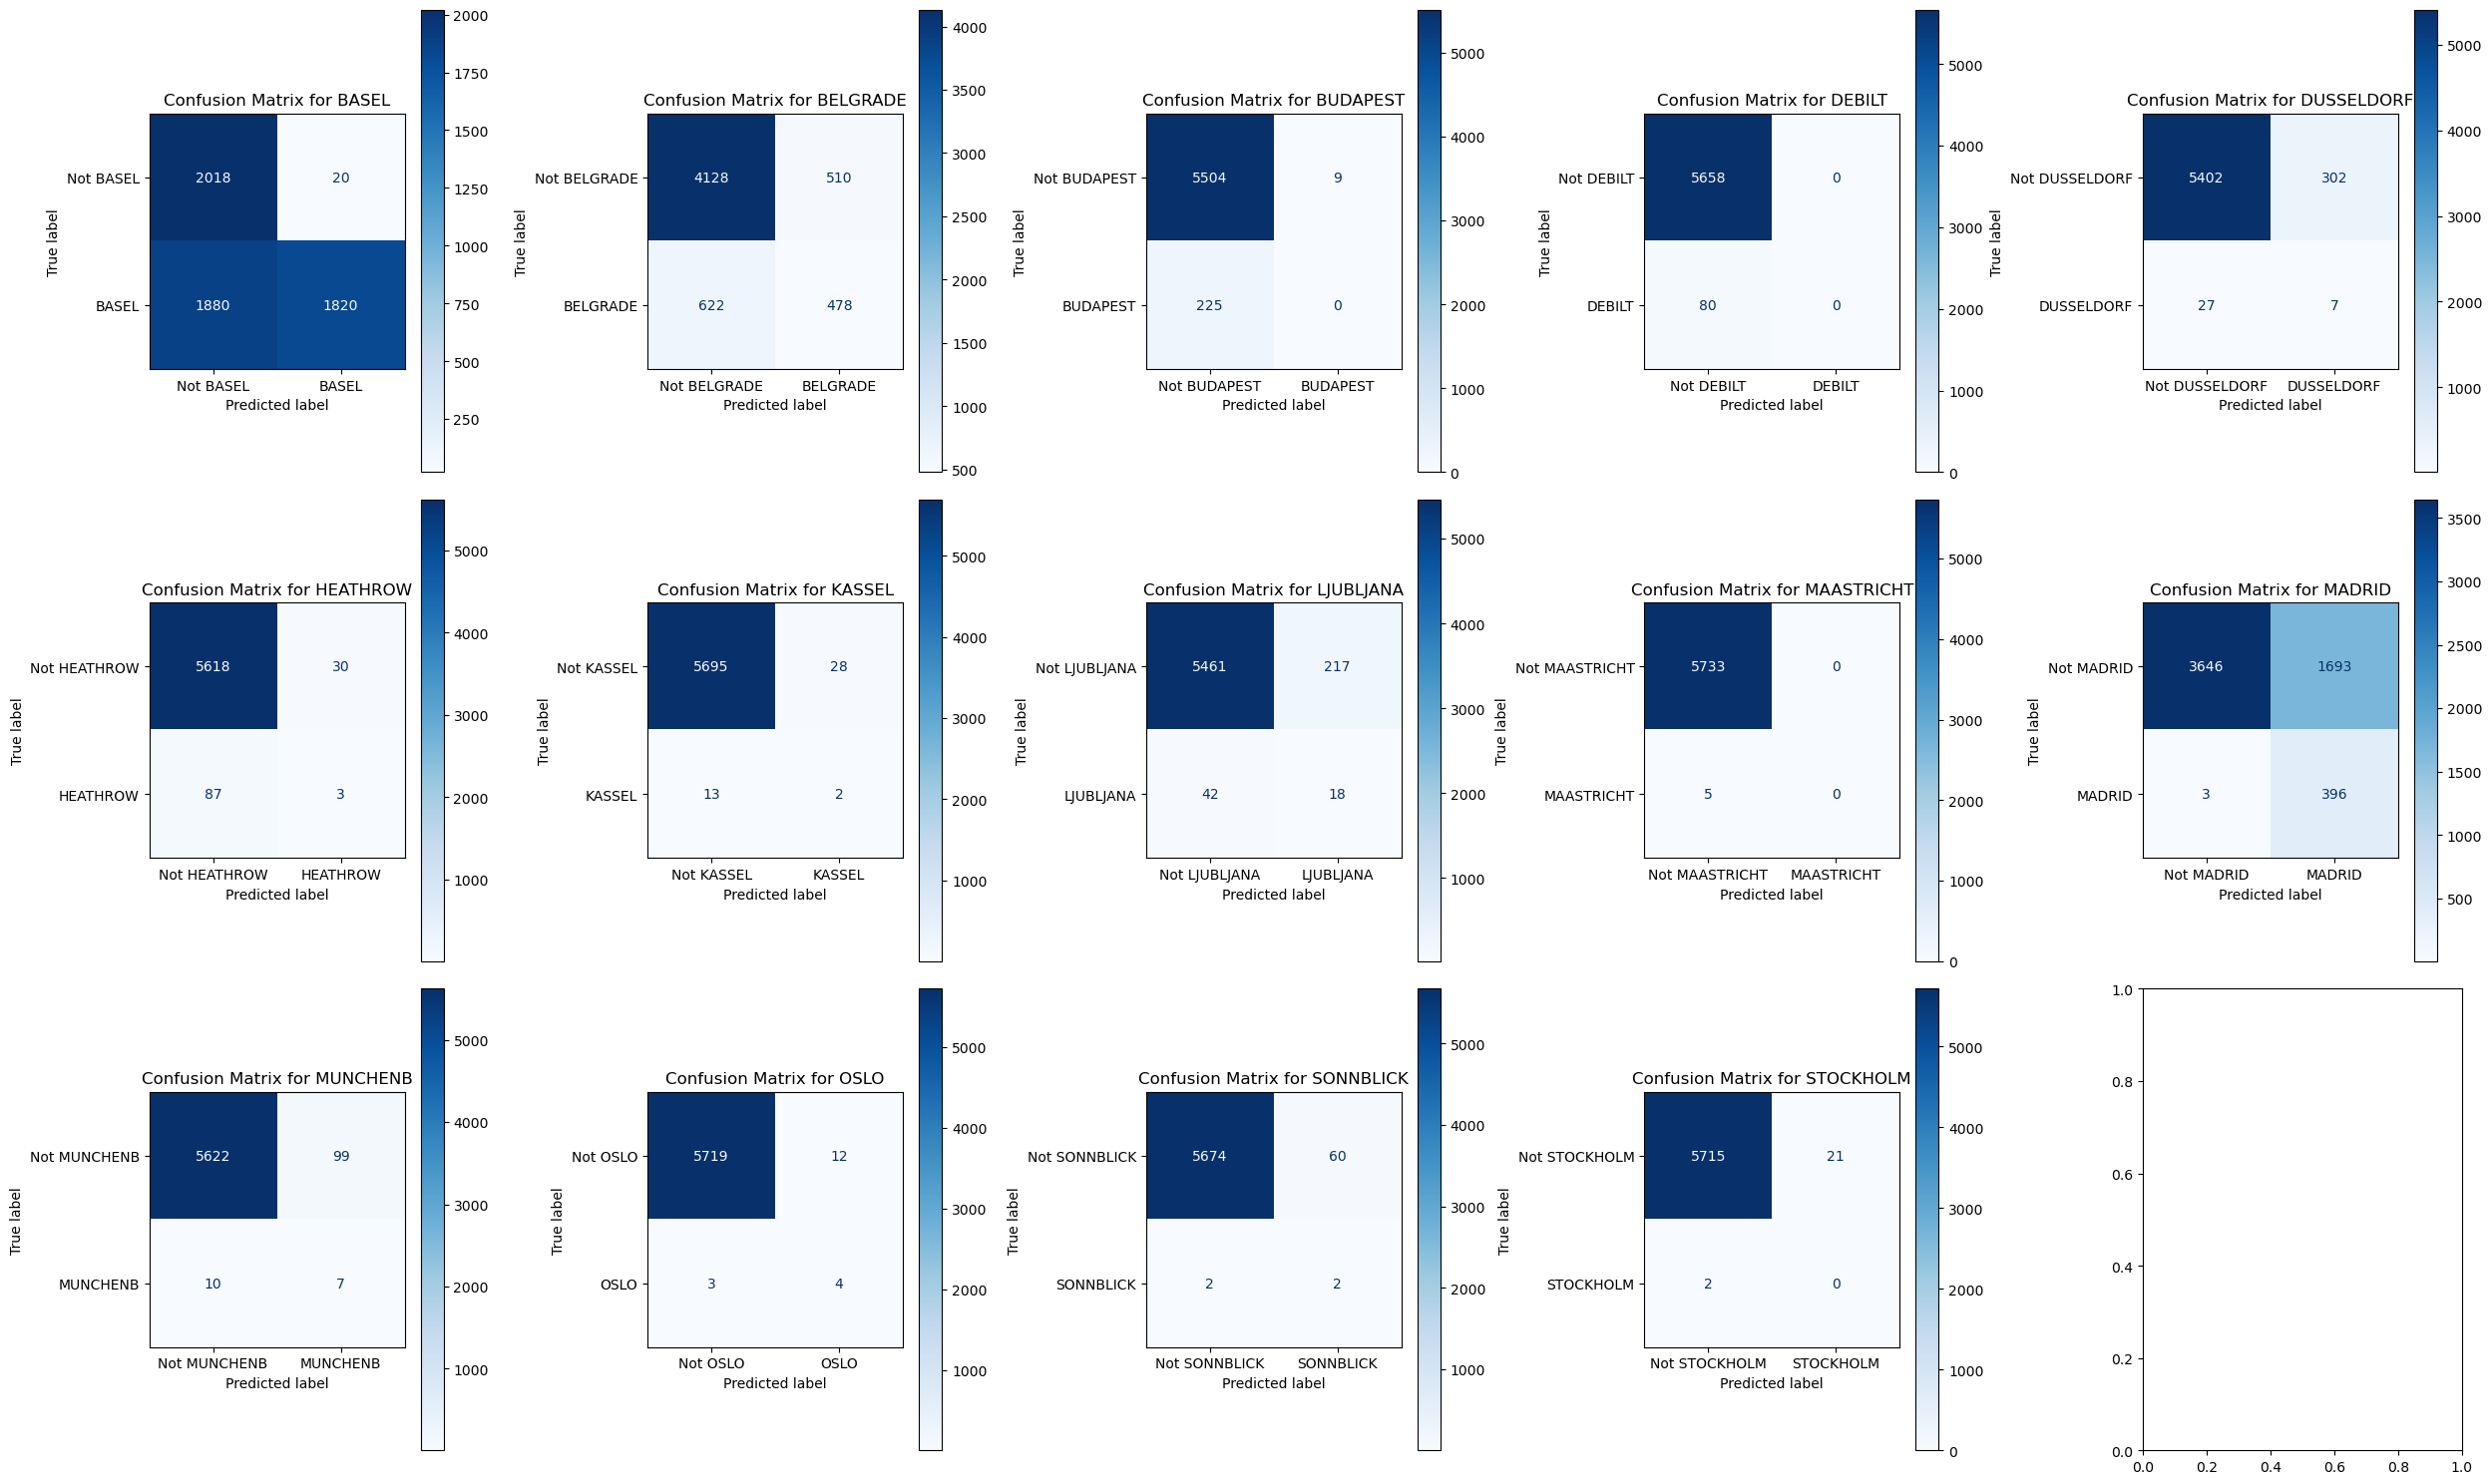

In [42]:
# Assuming y_train.columns gives the names of the stations or classes
class_labels = ['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 
                'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 
                'MUNCHENB', 'OSLO','SONNBLICK', 'STOCKHOLM', 'VALENTIA',]

# Plot confusion matrices for each label
plot_confusion_matrices(confusion_matrices, class_labels)

**RNN/LSTM 2**

In [43]:
# Running model again using different parameters
# Define parameters
epochs = 100  
batch_size = 64  
n_hidden = 128  

# Calculate timesteps and input dimensions
timesteps = X_train.shape[1]
input_dim = X_train.shape[2]
n_classes = len(y_train[0])

# Define the model
model = Sequential()
model.add(Input(shape=(timesteps, input_dim)))
model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))  
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(n_hidden, return_sequences=True))  
model.add(LSTM(n_hidden))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='sigmoid'))


In [44]:
# Compile the model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [45]:
# Train the model

model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/100
269/269 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1036 - loss: 0.3511
Epoch 2/100
269/269 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1600 - loss: 0.2316
Epoch 3/100
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1720 - loss: 0.2157
Epoch 4/100
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1695 - loss: 0.1992
Epoch 5/100
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1836 - loss: 0.1931
Epoch 6/100
269/269 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1977 - loss: 0.1845
Epoch 7/100
269/269 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2110 - loss: 0.1788
Epoch 8/100
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2201 - loss: 0.1752
Epoch 9/100
269/269 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2099 - loss: 0.1650
Epoch 10/100
269/269 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2024 - loss: 0.1621
Epoch 11/100
269/269 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2164 - loss: 0.1564
Epoch 12/100
269/269 ━━━━━━━━━━━━━━━━━━━━

In [46]:
# Predict on the test set

y_pred = model.predict(X_test)

180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [47]:
# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

In [48]:
# Generate confusion matrices for each class

confusion_matrices = multilabel_confusion_matrix(y_test_classes, y_pred_classes)

In [49]:
# Manually calculate accuracy
correct_predictions = np.sum(y_test_classes == y_pred_classes)
total_samples = len(y_test_classes)
accuracy = correct_predictions / total_samples

print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 21.75%


In [50]:
# Define function to plot confusion matrices
def plot_confusion_matrices(confusion_matrices, class_labels):
    fig, axes = plt.subplots(3, 5, figsize=(25, 15))  # 3x5 grid for 15 stations
    axes = axes.ravel()  # Flatten the axes array for easy iteration

    for i, (conf_matrix, label) in enumerate(zip(confusion_matrices, class_labels)):
        disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[f'Not {label}', label])
        disp.plot(ax=axes[i], values_format='d', cmap='Blues')
        axes[i].set_title(f'Confusion Matrix for {label}')

    plt.tight_layout()
    plt.show()

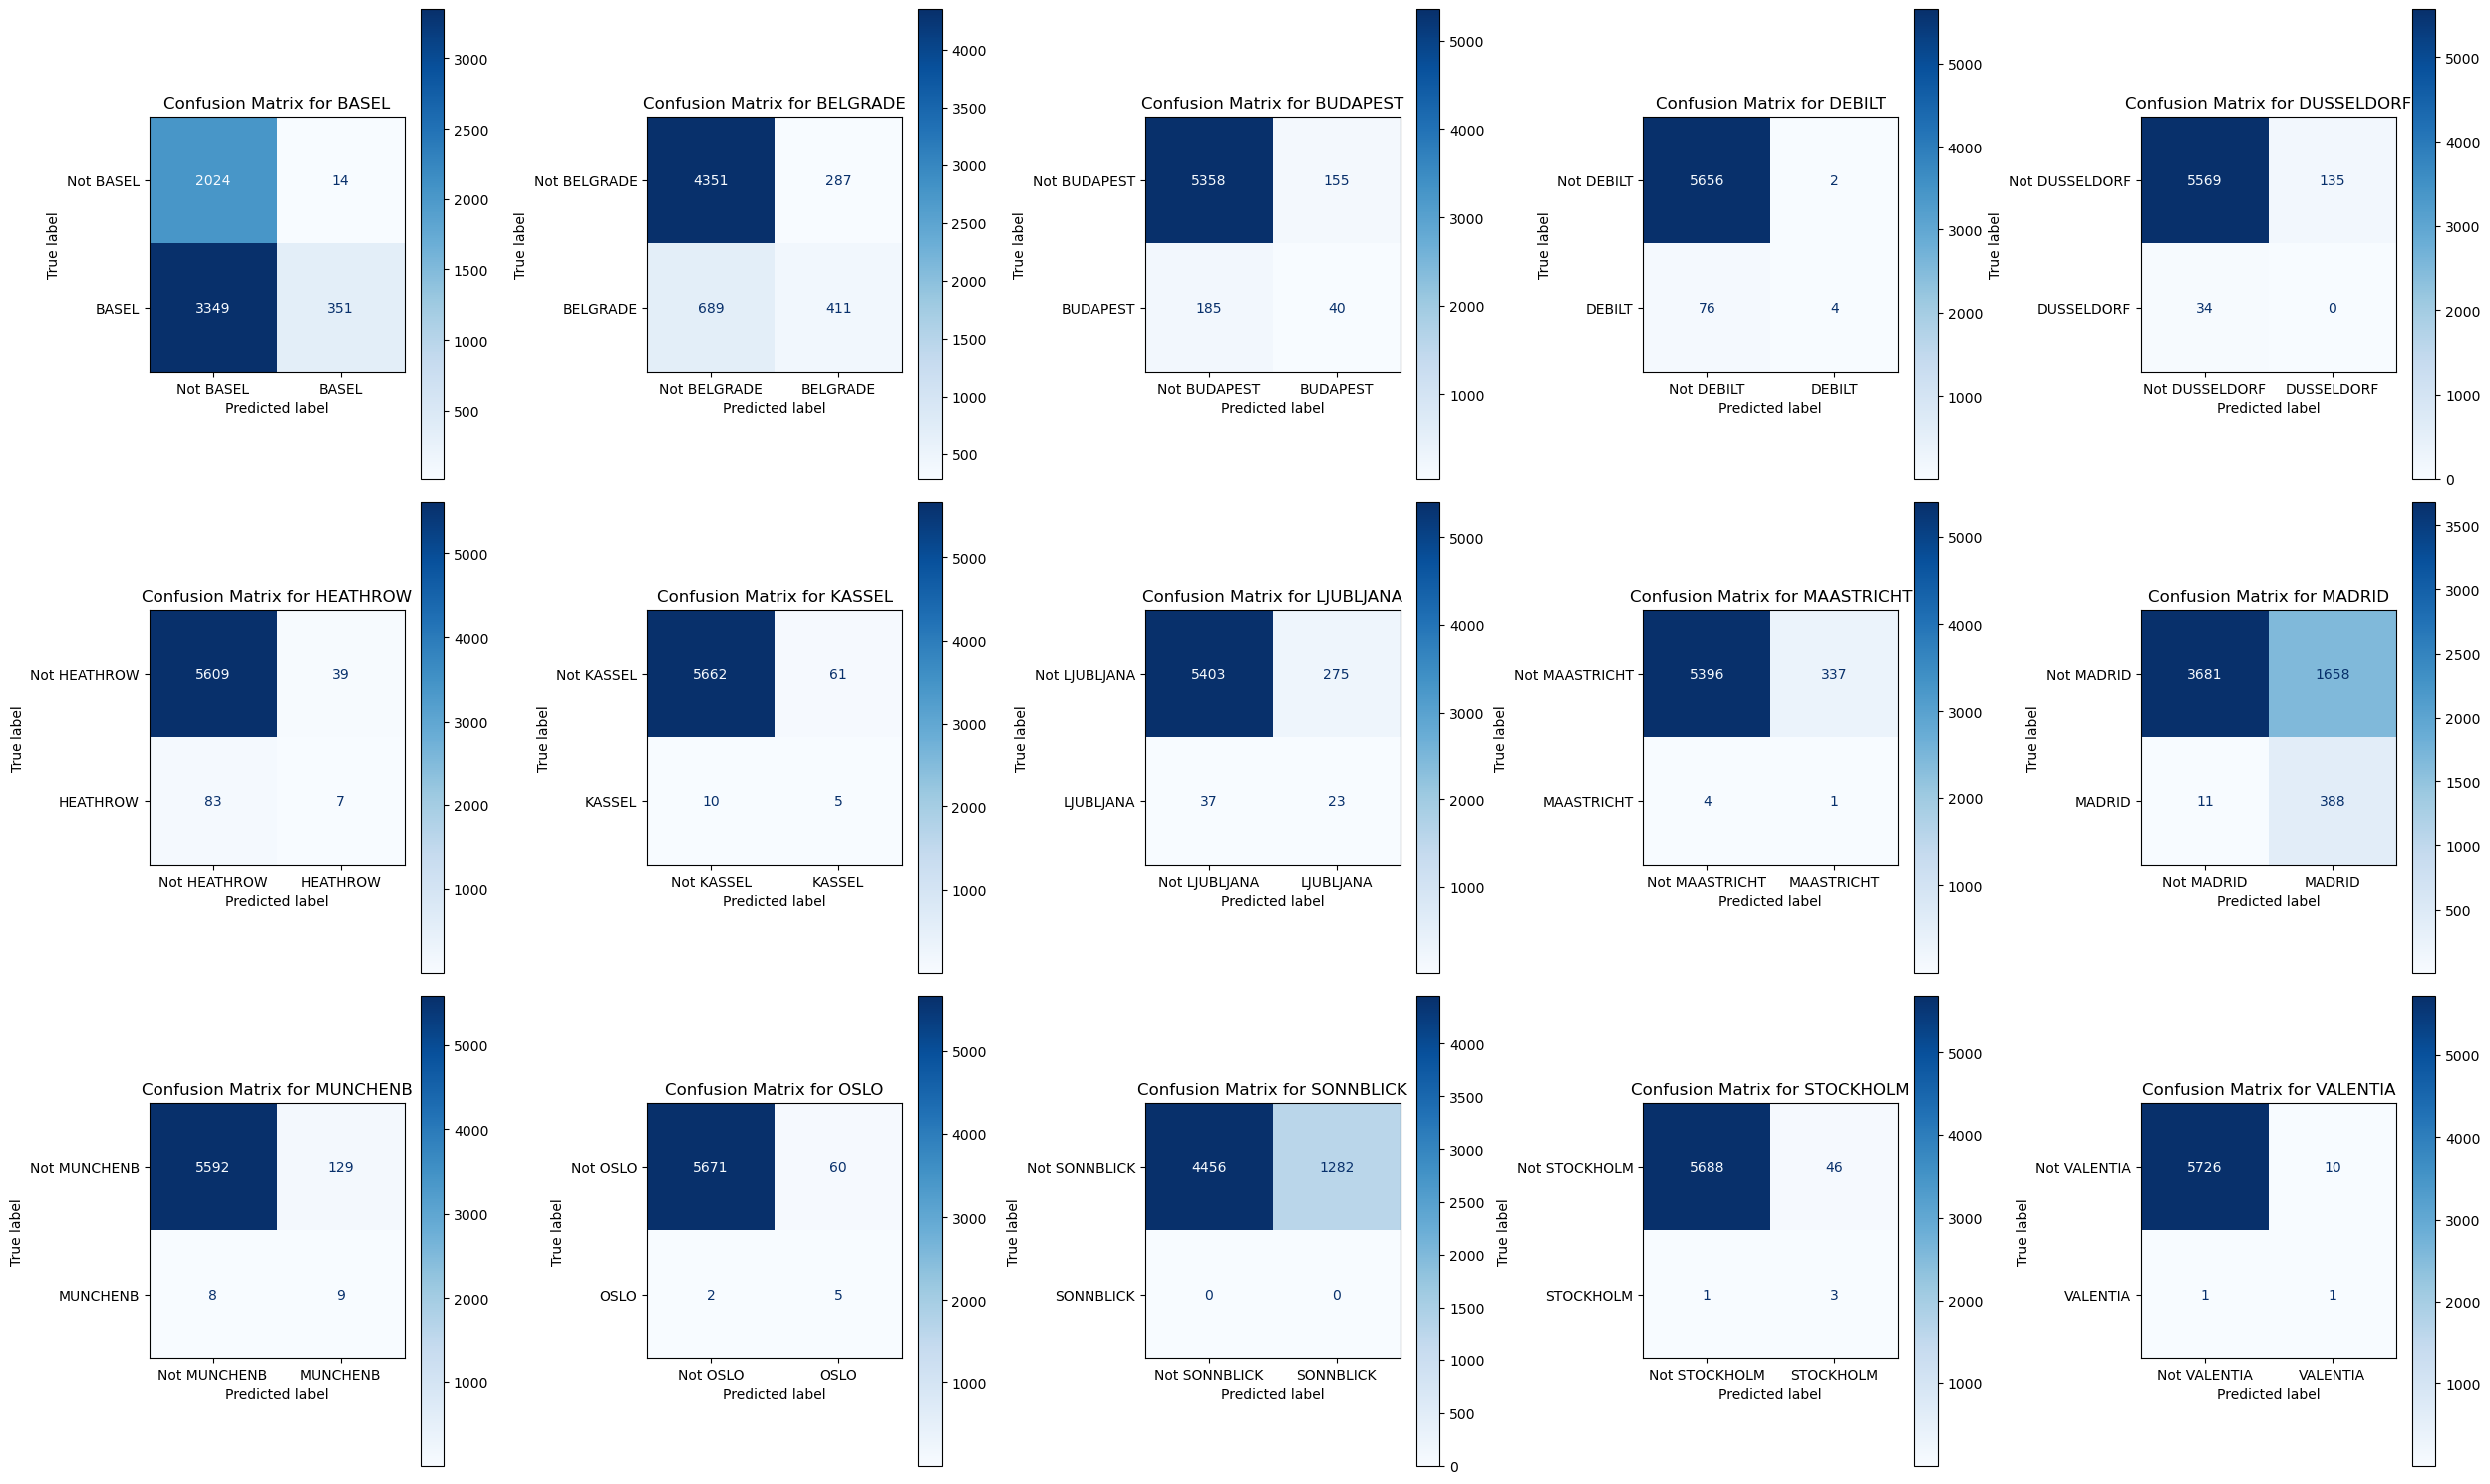

In [51]:
# Assuming y_train.columns gives the names of the stations or classes
class_labels = ['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 
                'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 
                'MUNCHENB', 'OSLO','SONNBLICK', 'STOCKHOLM', 'VALENTIA',]

# Plot confusion matrices for each label
plot_confusion_matrices(confusion_matrices, class_labels)

## 04. Convolution Neural Network (CNN)

In [52]:
# Define parameters
epochs = 100  # Number of epochs
batch_size = 64  # Batch size
filters = 256  # Number of filters in Conv1D layer
kernel_size = 3  # Kernel size for Conv1D layer
pool_size = 2  # Pool size for MaxPooling1D layer
dropout_rate = 0.5  # Dropout rate

# Calculate timesteps and input dimensions
timesteps = X_train.shape[1]
input_dim = X_train.shape[2]
n_classes = len(y_train[0])

# Define the model
model = Sequential()
model.add(Input(shape=(timesteps, input_dim)))
model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(Dropout(dropout_rate))
model.add(Flatten())
model.add(Dense(n_classes, activation='sigmoid'))

In [53]:
# Compile the model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [54]:
# Train the model

model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/100
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1288 - loss: 0.3517
Epoch 2/100
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1588 - loss: 0.2184
Epoch 3/100
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1689 - loss: 0.2046
Epoch 4/100
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1708 - loss: 0.1974
Epoch 5/100
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1704 - loss: 0.1879
Epoch 6/100
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1723 - loss: 0.1850
Epoch 7/100
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1772 - loss: 0.1776
Epoch 8/100
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1779 - loss: 0.1726
Epoch 9/100
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1791 - loss: 0.1694
Epoch 10/100
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1791 - loss: 0.1595
Epoch 11/100
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1928 - loss: 0.1575
Epoch 12/100
269/269 ━━━━━━━━━━━━━━━━━━━━

In [55]:
# Predict on the test set

y_pred = model.predict(X_test)

180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [56]:
# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

In [57]:
# Generate confusion matrices for each class

confusion_matrices = multilabel_confusion_matrix(y_test_classes, y_pred_classes)

In [58]:
# Manually calculate accuracy
correct_predictions = np.sum(y_test_classes == y_pred_classes)
total_samples = len(y_test_classes)
accuracy = correct_predictions / total_samples

print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 36.18%


In [59]:
# Define function to plot confusion matrices
def plot_confusion_matrices(confusion_matrices, class_labels):
    fig, axes = plt.subplots(3, 5, figsize=(25, 15))  # 3x5 grid for 15 stations
    axes = axes.ravel()  # Flatten the axes array for easy iteration

    for i, (conf_matrix, label) in enumerate(zip(confusion_matrices, class_labels)):
        if conf_matrix.sum() > 0:  # Plot only if the confusion matrix contains data
            disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[f'Not {label}', label])
            disp.plot(ax=axes[i], values_format='d', cmap='Blues')
            axes[i].set_title(f'Confusion Matrix for {label}')
        else:
            axes[i].axis('off')  # Hide empty subplots

    plt.tight_layout()
    plt.show()

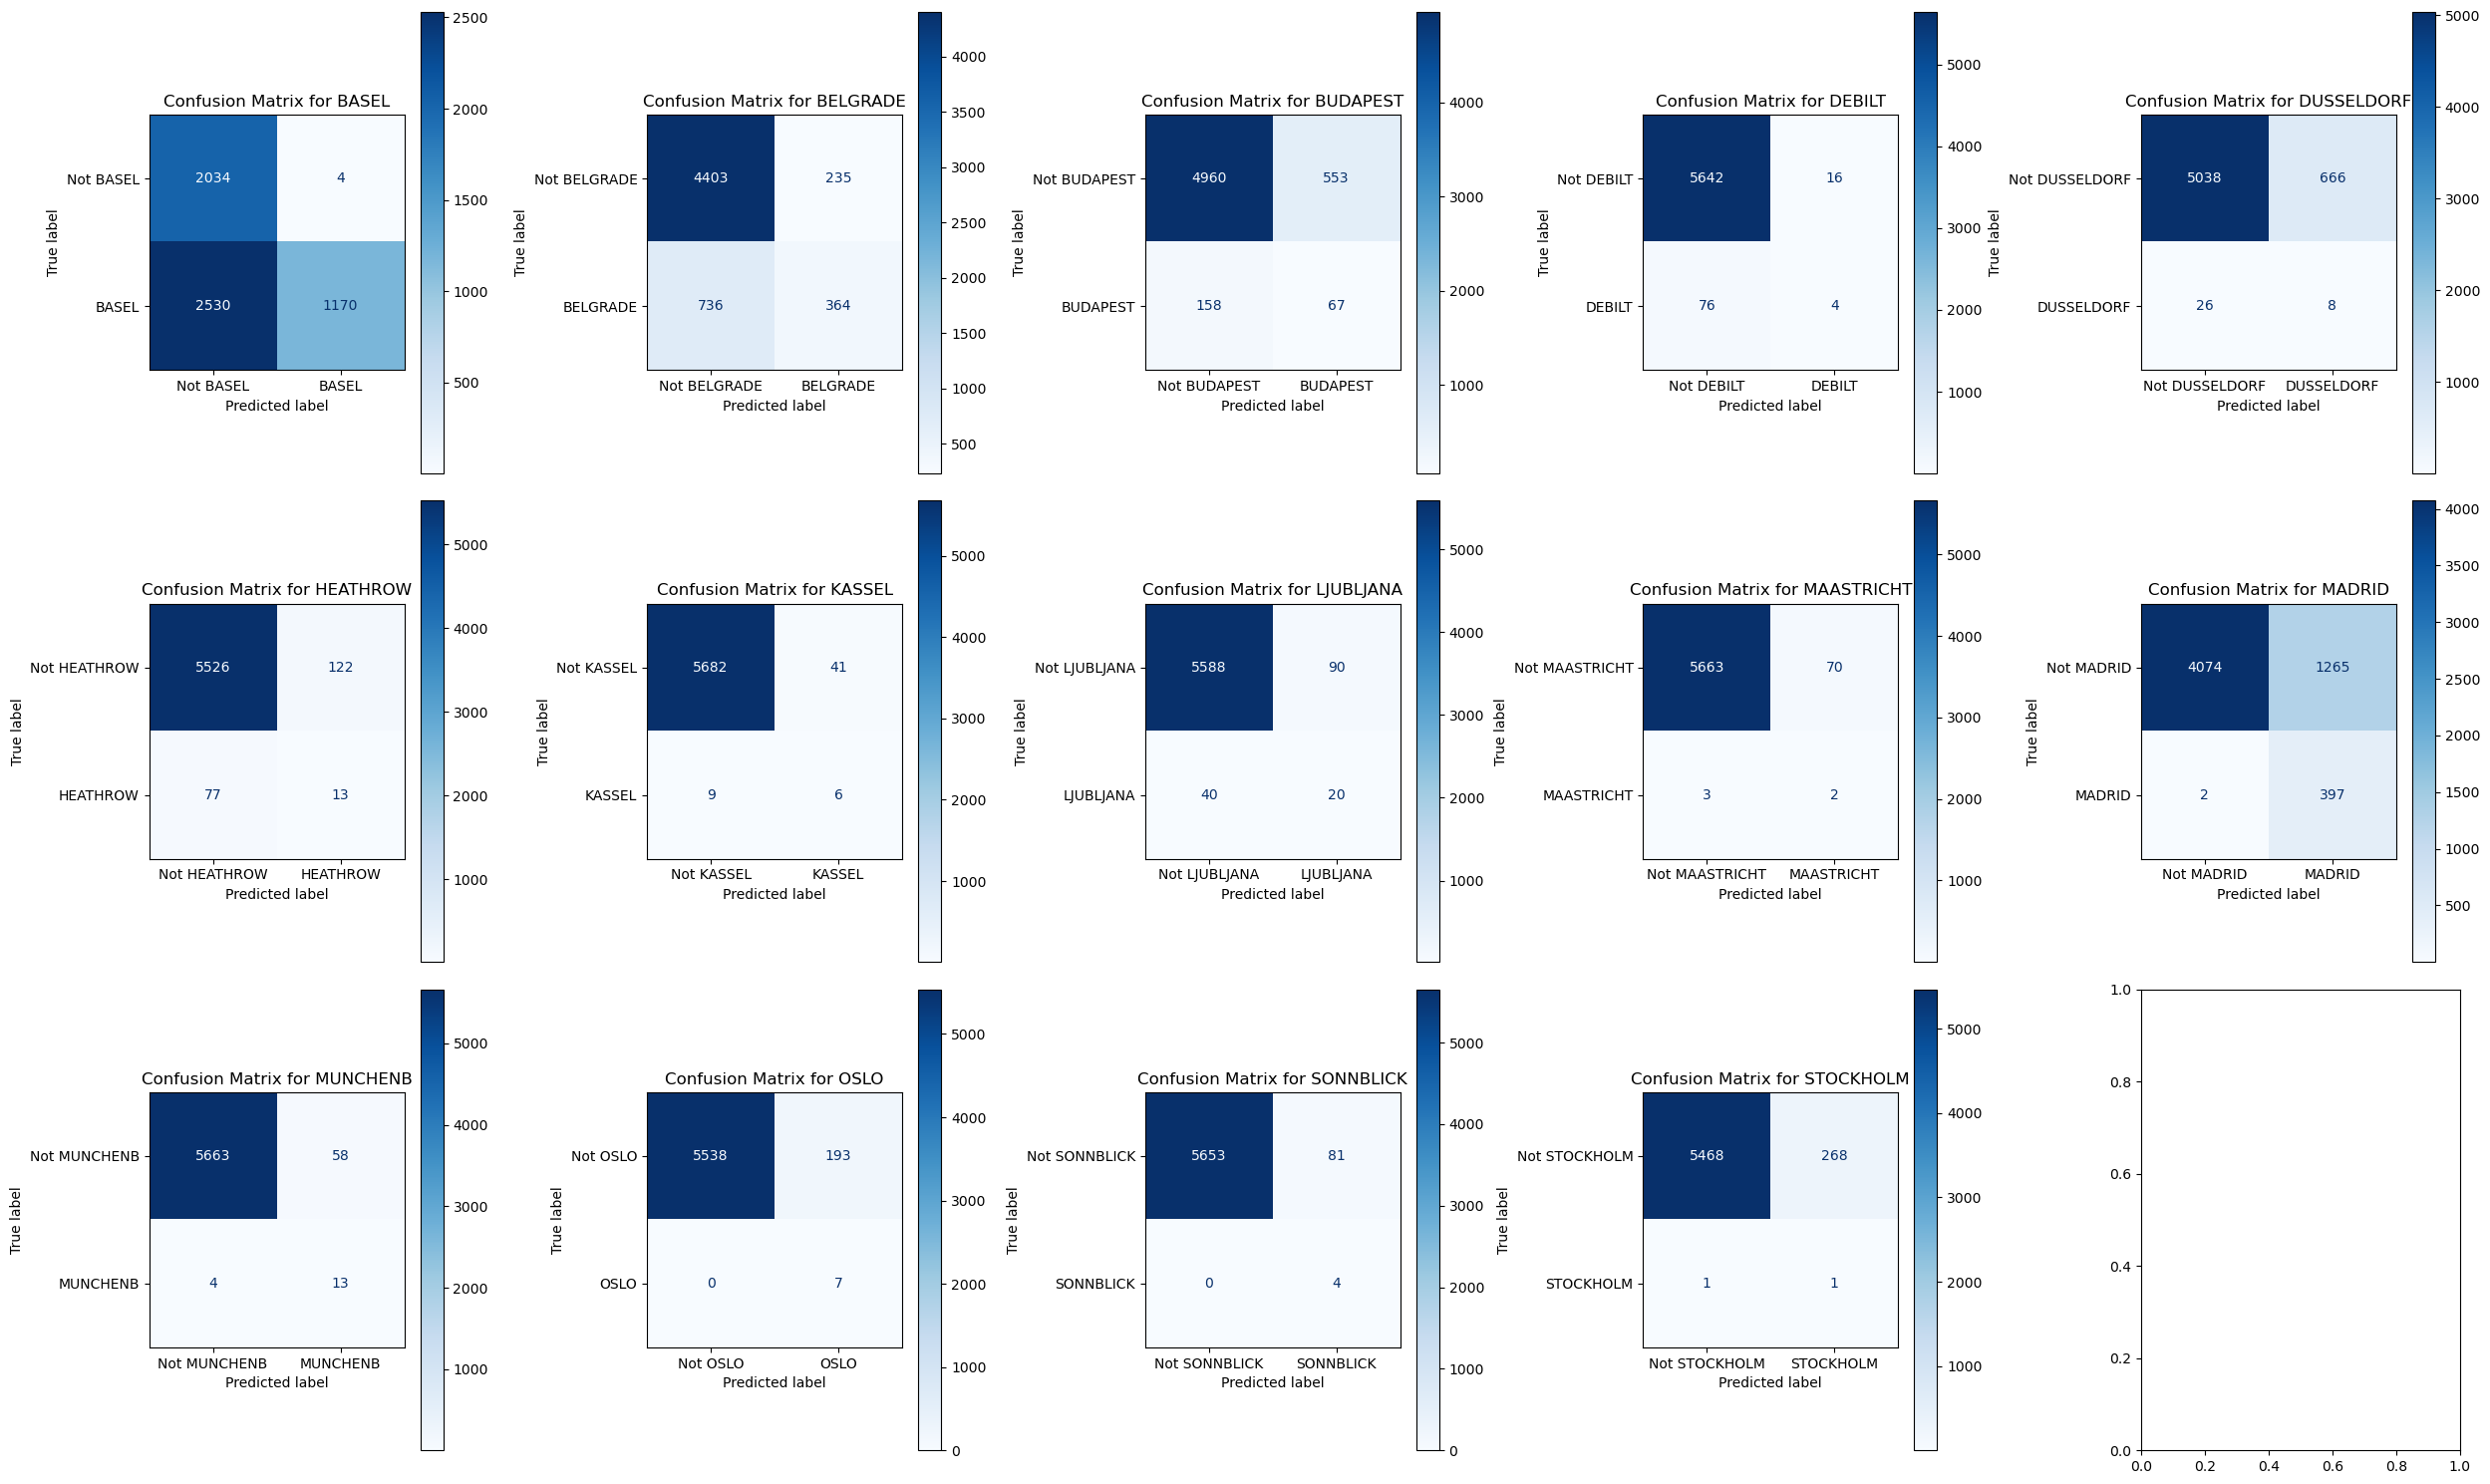

In [60]:
# Assuming y_train.columns gives the names of the stations or classes
class_labels = ['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 
                'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 
                'MUNCHENB', 'OSLO','SONNBLICK', 'STOCKHOLM', 'VALENTIA',]

# Plot confusion matrices for each label
plot_confusion_matrices(confusion_matrices, class_labels)